In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
#importing the dataset


filename = "imports-85.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style","drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type","num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(filename, names= headers)
#df.head()

df.replace("?",np.nan,inplace = True)
#df.head(23)



In [3]:
#Checking for missing data
#false for existing data; true for missing data
df.std()
missing_data = df.isnull()
missing_data.head(15)
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [3]:
#REPLACING MISSING DATA BY MEAN#

#axis = o  represents rows
#axis = 1 represents columns
# cast data in avg_norm_losses to float
avg_norm_losses = df["normalized-losses"].astype("float").mean(axis = 0)
avg_bore = df["bore"].astype("float").mean(axis = 0)
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
avg_horsepower = df["horsepower"].astype("float").mean(axis = 0)
avg_peakrpm = df["peak-rpm"].astype("float").mean(axis = 0)
# print("Mean of normalized losses: ",avg_norm_losses)
#replace missing value NaN with mean
df['normalized-losses'].replace(np.nan,avg_norm_losses,inplace=True)
df["bore"].replace(np.nan,avg_bore,inplace=True)
df["stroke"].replace(np.nan,avg_stroke,inplace=True)
df["horsepower"].replace(np.nan,avg_horsepower,inplace=True)
df["peak-rpm"].replace(np.nan,avg_peakrpm,inplace=True)

#df.head(20)

In [4]:
#REPLACING MISSING DATA BY FREQUENCY
#checks the most frequent value
df["num-of-doors"].value_counts().idxmax()
#replacing 
df["num-of-doors"].replace(np.nan,"four",inplace=True)
#df.head()


In [5]:
#REPLACING MISSING DATA BY DROPPING
#inplace = True && dropna // drops all missing data in the specified column(price)
df.dropna(subset=["price"],axis=0,inplace=True)
#reset index
df.reset_index(drop=True,inplace=True)
#df.head()

In [6]:
# Checking correct data format
#df.dtypes()
# df.head(20)
# Conversion to correct data format
"""df[["bore","stroke"]]=df[["bore","stroke"]].astype("float")
df[["normalized-losses"]]=df[["normalized-losses"]].astype("float")
df[["price"]]=df[["price"]].astype("float")
df[["peak-rpm"]]=df[["peak-rpm"]].astype("float")"""
df[["bore"]] = df[["bore"]].astype("float")
df[["stroke"]].astype("float")
df[["normalized-losses"]]=df[["normalized-losses"]].astype("float")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]]=df[["peak-rpm"]].astype("float")
#df.head(20)

In [7]:
#conversion  from mpg to l/100km

df['city-L/100km'] = 235/df["city-mpg"]
df["highway-L/100km"]=235/df["highway-mpg"]
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462


In [8]:
#normalization approach: replace original value by (original/max)
#normalize the width , length, height
df["width"] = df["width"]/df["width"].max()
df["length"] = df["length"]/df["length"].max()
df["height"] = df["height"]/df["height"].max()
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [9]:
"""#Binning: transforming continuous numerical variables into discrete cartegorical bins for grouped analysis"""
df["horsepower"] = df["horsepower"].astype(float, copy=True,errors='raise')#conversion to correct format
df["horsepower"].head()


0    111.0
1    111.0
2    154.0
3    102.0
4    115.0
Name: horsepower, dtype: float64

Text(0.5, 1.0, 'horsepower bins')

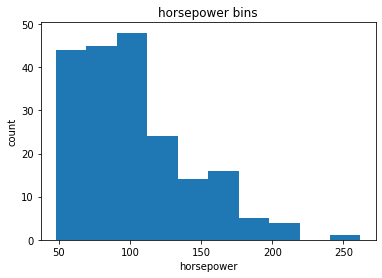

In [10]:
#a look at the distribution of horsepower
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower-bins')

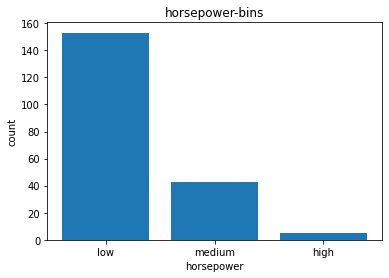

In [10]:
# binning
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

bins = np.linspace(min(df["horsepower"]),max(df["horsepower"]),4)
bins
group_names = ["low","medium","high"]
#"""apply the function 'cut' to determine where each value in 'horsepower ' belongs to"""
df["horsepower-binned"] = pd.cut(df["horsepower"],bins,labels=group_names,include_lowest=True)
df[["horsepower","horsepower-binned"]].head(5)
df["horsepower-binned"].value_counts()

#plotting Distribution for each bin
pyplot.bar(group_names,df["horsepower-binned"].value_counts())
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower-bins")




Text(0.5, 1.0, 'horsepower bins')

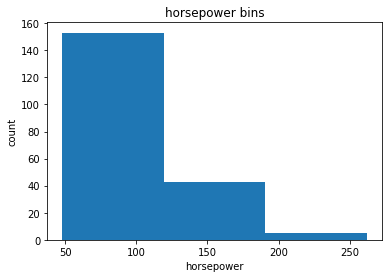

In [11]:
#Bins Visualization
""" histogram for Visualization of created bins"""
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
#histogram attribbute=horsepower, bins=3
plt.pyplot.hist(df["horsepower"],bins = 3)

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [12]:
"""Indicator variable/dummy variables: numerical variables used to label cartegories
Dummy variables are used to make regression analysis easier for cartegorical variables
"""
import pandas as pd
#fuel-type: two cartegorical variables
#conversion of fuel-type to dummy variables for regression analysis
#pandas method get_dummies to assign numerical values:sets diesel=0,gas=1
df.columns
dummy_variable1 = pd.get_dummies(df["fuel-type"])
dummy_variable1.rename(columns = {'gas':'fuel-type-gas','diesel':'fuel-type-diesel'},inplace=True)

#merge dataframe pd with dummy_variable1
df = pd.concat([df,dummy_variable1],axis=1)
#drop original column fuel-type from df
df.drop("fuel-type",axis=1,inplace=True)
#dummy_variable1.head()
df.head()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,0,1


In [13]:
df.loc[:,~df.columns.duplicated()]

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,8.392857,0,1
197,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,9.400000,0,1
198,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,10.217391,0,1
199,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,8.703704,1,0


In [14]:
df.columns
""" Indicator variable for column aspiration , merge the dataframes, drop column aspiration"""
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'highway-L/100km', 'fuel-type-diesel', 'fuel-type-gas'],
      dtype='object')

In [15]:
"""Exploratory Data Analysis"""
#Analyzing individual feature patterns using visulization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#display variable type to understand the right visualization method for each individual variable
print(df.dtypes)

symboling              int64
normalized-losses    float64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
highway-L/100km      float64
fuel-type-diesel       uint8
fuel-type-gas          uint8
dtype: object


In [25]:
#correlation between vaiables
df[['bore','stroke','compression-ratio','horsepower']].corr()
#strong correlation: the closer the r-value is to 1 or -1 the stronger the correlationopposite is True

,bore,compression-ratio,horsepower
bore,1.000000,0.001263,0.566936
compression-ratio,0.001263,1.000000,-0.214514
horsepower,0.566936,-0.214514,1.000000


,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


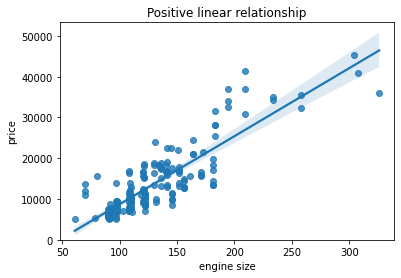

In [21]:
#relationship between individual variable andvariable(price)
#use seaborn regplot (scatterplots+ fitted regression line)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#engine-size as predictor variable
sns.regplot(x="engine-size",y="price",data=df)
plt.xlabel("engine size")
plt.ylabel("price")
plt.title("Positive linear relationship")
plt.ylim(0,)
df[['engine-size','price']].corr()#determone the correlation:Strong:0.872335

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


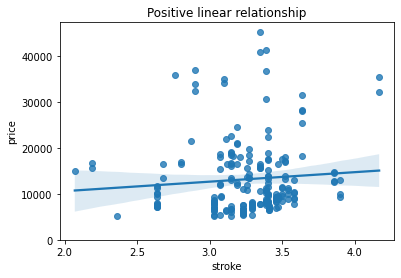

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#stroke as predictor variable
df["stroke"] = df["stroke"].astype(float, copy=True,errors='raise')
sns.regplot(x="stroke",y="price",data=df)
plt.xlabel("stroke")
plt.ylabel("price")
plt.title("Positive linear relationship")
plt.ylim(0,)
df[['stroke','price']].corr()

<AxesSubplot:xlabel='engine-location', ylabel='price'>

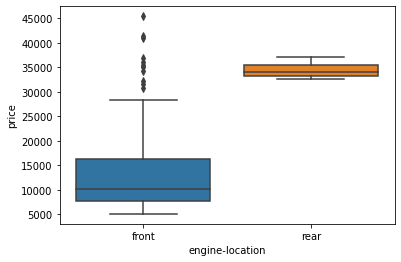

In [23]:
#Boxplots with cartegorical variables
import seaborn as sns
sns.boxplot(x="engine-location",y="price",data=df)
#price distribution is distinct enough, engine location is a good predictor viarable

<AxesSubplot:xlabel='body-style', ylabel='price'>

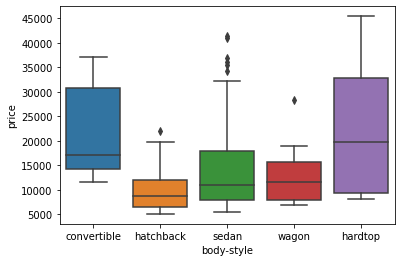

In [24]:
import seaborn as sns

sns.boxplot(x="body-style",y="price",data=df)
#significant overlap

In [35]:
"""Descriptive Stat Analysis"""
#The describe function automatically computes basic stat for all continuos variables
"""
Shows:
the count of that variable
the mean
the standard deviation (std)
the minimum value
the IQR (Interquartile Range: 25%, 50% and 75%)
the maximum value
"""
df.describe()
#df.describe(include=['object'])

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000
